# 2. OVO AND OVR

2.A. Download the Fashion-MNSIT dataset (https://github.com/zalandoresearch/fashion-mnist) and
perform EDA (at least 4 techniques) on it.

In [ ]:
from utils import mnist_reader
from keras.datasets import fashion_mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from math import comb
from utils import mnist_reader as mr
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.multiclass import OneVsRestClassifier
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import warning
import pickle


In [ ]:
x_test.shape

We observe in trainX, there are 60000 images of shape 28x28 and in testX there are 10000 images of shape 28x28. Thus, the shape of all images is 28x28. Hence, yes, all images are of the same size.

In [2]:
train_data, train_labels = mr.load_mnist('data/fashion', kind='train')
test_data, test_labels = mr.load_mnist('data/fashion', kind='t10k')

data = np.vstack((train_data, test_data))
labels = np.hstack((train_labels, test_labels)).reshape((-1, 1))

dataset = np.hstack((data, labels))

print(train_data.shape)
print(test_data.shape)
print(data.shape)
print(data[0].shape)
print(dataset.shape)
print(data[0])

(60000, 784)
(10000, 784)
(70000, 784)
(784,)
(70000, 785)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0 

### EDA ###
1) Checking for missing data, describing the dataset, plotting 5 images of each class.
2) Checking if each image has the same size 
3) Performing normalisation
4) Checking class imbalance

Column 0: 0.00% missing
Column 1: 0.00% missing
Column 2: 0.00% missing
Column 3: 0.00% missing
Column 4: 0.00% missing
Column 5: 0.00% missing
Column 6: 0.00% missing
Column 7: 0.00% missing
Column 8: 0.00% missing
Column 9: 0.00% missing
Column 10: 0.00% missing
Column 11: 0.00% missing
Column 12: 0.00% missing
Column 13: 0.00% missing
Column 14: 0.00% missing
Column 15: 0.00% missing
Column 16: 0.00% missing
Column 17: 0.00% missing
Column 18: 0.00% missing
Column 19: 0.00% missing
Column 20: 0.00% missing
Column 21: 0.00% missing
Column 22: 0.00% missing
Column 23: 0.00% missing
Column 24: 0.00% missing
Column 25: 0.00% missing
Column 26: 0.00% missing
Column 27: 0.00% missing
Column 28: 0.00% missing
Column 29: 0.00% missing
Column 30: 0.00% missing
Column 31: 0.00% missing
Column 32: 0.00% missing
Column 33: 0.00% missing
Column 34: 0.00% missing
Column 35: 0.00% missing
Column 36: 0.00% missing
Column 37: 0.00% missing
Column 38: 0.00% missing
Column 39: 0.00% missing
Column 40:

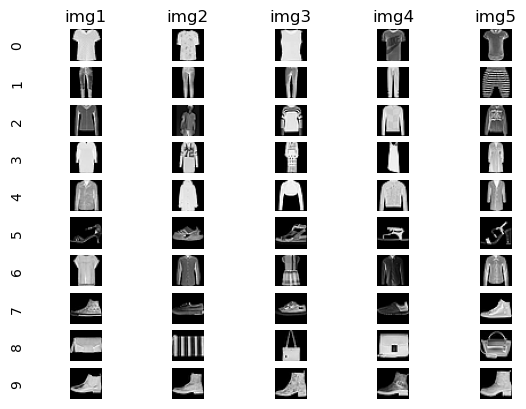

In [3]:
#step 1 -> Checking for missing data, describing the dataset, plotting 5 images of each class.
#the code below is used to display the number and the %age of the missing values for each column
missing_values = np.isnan(dataset).sum(axis=0)
total_values = dataset.shape[0]
percent_missing = (missing_values / total_values) * 100
for i, val in enumerate(percent_missing):
    print(f"Column {i}: {val:.2f}% missing")
print("Shape of dataset:", dataset.shape)
print("Data type of dataset:", dataset.dtype)
print("Number of dimensions:", dataset.ndim)
print("Size of dataset:", dataset.size)
print("Minimum value:", np.min(dataset))
print("Maximum value:", np.max(dataset))

#Plotting 5 images of each class
def create_grid():
# Create random images
    images = [[[[0]*28]*28]*5] * 10
    images = np.array(images)
    print(images.shape)
    
    count = [0]*10
    j = 0
    images_added = 0
    
    indices = list(range(len(dataset_y)))
    random.shuffle(indices) #to shuffle the indices
    random_ind = 0
    for i in indices:
        if(count[dataset_y[i]]<5):
            images[dataset_y[i]][count[dataset_y[i]]] = dataset_X[i].reshape((28,28))
            count[dataset_y[i]]+=1
            images_added+=1
            random_ind = i
        if images_added == 50:
            break
    #the above for loop adds random images to the array
    
    # Create a 5x5 grid of subplots
    fig, axs = plt.subplots(10, 5)

    # Loop through the subplots and display a random image in each
    for i in range(10):
        for j in range(5):
            axs[i, j].imshow(images[i][j], cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title(" ")
    
    for ax, col_label in zip(axs[0], ["img1", "img2", "img3", "img4", "img5"]):
        ax.set_title(col_label)

    # Add row labels
    for ax, row_label in zip(axs[:,0], ["0","1", "2", "3", "4", "5","6","7","8","9"]):
        ax.annotate(row_label, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    ha='right', va='center', rotation=90)
    plt.show()
    
create_grid()

In [4]:
#step 2 -> checking if each image is of the same size
def check_size(dataset):
    size = None
    for i in range(1,len(dataset)):
        size = dataset[i].shape
        if(dataset[i].shape != dataset[i-1].shape):
            
            return False
    print("The size of the image is -> " ,size)
    return True

print(check_size(dataset_X))
print("True is only printed if all the images are of the same size")

The size of the image is ->  (784,)
True
True is only printed if all the images are of the same size


In [5]:
#step 3 -> Performing normalisation

# The images in the given dataset are of the shape -> (784,) we will first convert this image type to 28*28 as numpy

def get_max_val(dataset_X):
    return np.amax(dataset_X)

normalising_factor = get_max_val(dataset_X)
print(normalising_factor)

def normalize_dataset(dataset_X,normalising_factor):
    dataset_X = dataset_X.astype('float32') / normalising_factor
    return dataset_X
    
dataset_X = normalize_dataset(dataset_X, normalising_factor)
print(dataset_X)


255
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


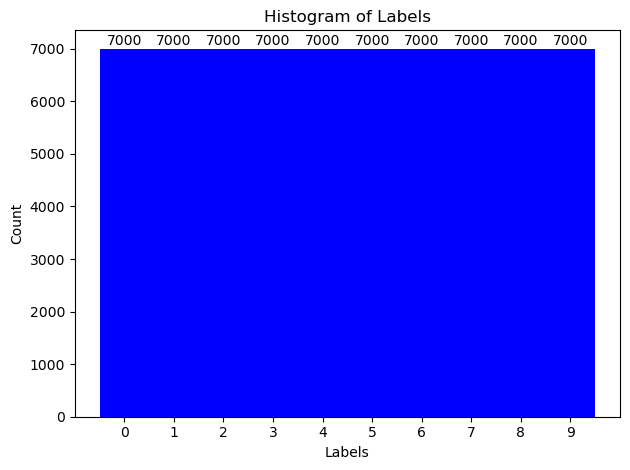

In [6]:
#step 4 -> Checking class imbalance

def return_labels(dataset_y):
    #this functions returns all the labels of the corresponding dataset
    lst = []
    for i in dataset_y:
        if i not in lst:
            lst.append(i)
    
    return lst

labels = sorted((return_labels(dataset_y)))

def plot_hst(dataset_y,labels):
    #this function plots the histogram
    label_cnt = len(labels)
    count = [0]*label_cnt
    for i in range(len(dataset_y)):
        count[dataset_y[i]]+=1
    
    fig, ax = plt.subplots()
    ax.bar(labels,count, align='center', width=1, color='blue')
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Histogram of Labels')
    
    ax.set_xticks(labels)
    #for displaying the count on top of each bar
    for i, v in enumerate(count):
        ax.text(i, v+10, str(v), color='black', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    
plot_hst(dataset_y,labels)


## Q2B. OVR ##

For training the One V One classifier I will follow the following steps:
1) Firstly i will have to create and store 10C2 logistic regression models. In One V One classifiication each feature is weighed against every other feature for every datapoint and since there are 10 features and we choose 2 features at a time we will have to train 10c2 models.
2) After creating 45 models, we will make datasets for each model consisting of only 2 classes.
3) we will train the models on the created datasets.
4) I have then calculated the final class for each data point in the testing dataset using a voting system in which the digit which has the max votes is classifies as the final prediction for that dataset

In [7]:
classes = np.unique(dataset_y)
len(classes)

10

In [8]:

def create_ovo_dataset(X, y, class1, class2):
    mask = (y == class1) | (y == class2)
    X_filtered = X[mask]
    y_filtered = y[mask]
    y_binary = (y_filtered == class2).astype(int)
    X_shuffled, y_shuffled = shuffle(X_filtered, y_binary, random_state=2)
    return X_shuffled, y_shuffled


In [9]:
classifiers = [[LogisticRegression(random_state=2, max_iter=1000) if j > i else None for j in range(len(classes))] for i in range(len(classes))]

for i, c1 in enumerate(classes):
    for j, c2 in enumerate(classes[i+1:], i+1):
        X_ovo, y_ovo = create_ovo_dataset(train_X, train_y, c1, c2)
        classifiers[i][j].fit(X_ovo, y_ovo)


In [11]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class BinaryLogisticRegression:
    def __init__(self, alpha=0.01, n_iters=1000, threshold=0.5):
        self.alpha = alpha
        self.n_iters = n_iters
        self.threshold = threshold

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        for _ in range(self.n_iters):
            z = np.dot(X, self.w) + self.b
            h = self.sigmoid(z)
            dw = (1/m) * np.dot(X.T, (h - y))
            db = (1/m) * np.sum(h - y)
            self.w -= self.alpha * dw
            self.b -= self.alpha * db

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        h = self.sigmoid(z)
        y_pred = np.where(h > self.threshold, 1, 0)
        return y_pred

# Load Fashion MNIST dataset
data = np.load('fashion_mnist.npz')
X = data['X_train']
y = data['y_train']

# Reshape and normalize input data
X = X.reshape((X.shape[0], -1))
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classes
classes = np.unique(y)
num_classes = len(classes)

# Train one-vs-one classifiers
clf_arr = []
for i in range(num_classes):
    for j in range(i+1, num_classes):
        class_1 = classes[i]
        class_2 = classes[j]
        X_ij = train_X[(train_y == class_1) | (train_y == class_2)]
        y_ij = train_y[(train_y == class_1) | (train_y == class_2)]
        y_ij = np.where(y_ij == class_1, 0, 1)
        clf_ij = BinaryLogisticRegression()
        clf_ij.fit(X_ij, y_ij)
        clf_arr.append(clf_ij)

# Predict on testing data
proba_arr = np.zeros((len(clf_arr), len(test_X)))
for i, clf in enumerate(clf_arr):
    proba_arr[i] = clf.predict(test_X)

y_pred = np.zeros(len(test_X))
for i in range(len(test_X)):
    class_votes = np.zeros(num_classes)
    for j, class_ in enumerate(classes):
        clf_indices = np.where((test_y == class_) | (test_y == classes[j+1]))[0]
        class_proba = np.mean(proba_arr[:, clf_indices], axis=1)
        class_votes[j] = np.argmax(class_proba)
    y_pred[i] = classes[np.argmax(class_votes)]

# Evaluate model
print(accuracy_score(test_y, y_pred))


0.8299


In [ ]:
with open('OVO_model_array.pkl', 'wb') as file:
    pickle.dump(clf_arr, file)

# Q2C. OVR classifier

In [12]:
# Create a list of classifiers
classifiers = []
for _ in range(len(classes)):
    clf = LogisticRegression(random_state=2, max_iter=1000)
    classifiers.append(clf)

# Convert labels to one-hot encoding for training data
num_train_classes = np.max(train_y) + 1
train_y_one_hot = np.zeros((train_y.shape[0], num_train_classes))
train_y_one_hot[np.arange(train_y.shape[0]), train_y] = 1
print(train_y_one_hot.shape)

# Convert labels to one-hot encoding for test data
num_test_classes = np.max(test_y) + 1
test_y_one_hot = np.zeros((test_y.shape[0], num_test_classes))
test_y_one_hot[np.arange(test_y.shape[0]), test_y] = 1
print(test_y_one_hot.shape)

# Train each classifier
for i, clf in enumerate(classifiers):
    clf.fit(train_X, train_y_one_hot[:, i])


(60000, 10)
(10000, 10)


In [13]:
with open('ovr_models.pickle', 'wb') as file:
    pickle.dump(clf_arr, file)

In [14]:
num_test_samples = len(test_X)
proba_array = np.array([clf.predict_proba(test_X)[:,1] for clf in clf_arr])

predicted_labels = np.argmax(proba_array, axis=0)

print(predicted_labels)
print(test_y)
print(accuracy_score(test_y, predicted_labels))
print(r2_score(test_y, predicted_labels))

10000
[9. 2. 1. ... 8. 1. 5.]
[9 2 1 ... 8 1 5]
0.8357
0.7478424242424242


# Q2D. OVO and OVR using Scikit Learn #

In [15]:
lr = LogisticRegression(random_state=2, max_iter=1000)
ovr = OneVsOneClassifier(lr)
ovr.fit(train_X, train_y)

y_pred = ovr.predict(test_X)

print(y_pred)
print(test_y)
print(accuracy_score(test_y, y_pred))
print(r2_score(test_y, y_pred))


[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]
0.8303
0.7285939393939393


In [16]:
clf = LogisticRegression(random_state=2, max_iter=1000)
ovoclf = OneVsOneClassifier(clf)
ovoclf.fit(train_X, train_y)

with open('OVO_skmodel_array.pkl', 'wb') as file:
    pickle.dump(ovoclf, file)

In [17]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
import pickle

# train the OVR classifier
ovr_clf = OneVsRestClassifier(LogisticRegression(random_state=2, max_iter=1000)).fit(train_X, train_y)

# make predictions on the test set
y_pred = ovr_clf.predict(test_X)

# evaluate the performance of the classifier
acc_score = accuracy_score(test_y, y_pred)
r2_score = r2_score(test_y, y_pred)

# print the results
print(f"Predicted labels: {y_pred}")
print(f"True labels: {test_y}")
print(f"Accuracy score: {acc_score}")
print(f"R2 score: {r2_score}")

# save the model to a file
with open('OVR_skmodel_array.pkl', 'wb') as f:
    pickle.dump(ovr_clf, f)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]
0.8357
0.7478424242424242


In [18]:
import joblib

ovr_clf = OneVsRestClassifier(LogisticRegression(random_state=2, max_iter=1000))
ovr_clf.fit(train_X, train_y)

joblib.dump(ovr_clf, 'OVR_model.joblib')

It is interesting to see that the scores of the Sklearn implementation and our implementation are nearly identical. Given that both implementations employ the sklearn module's Logistic Regression model, with the exception of the hyperparameters, this was more or less predicted. Also, this demonstrates that we correctly implemented OVO AND OVR. When values are just a little bit low, the hyperparameters could be different.

In [19]:
data_dir = "dataset"
print(os.listdir(data_dir))

['.DS_Store', 'Parasitized', 'Uninfected']


# Q3A

### EDA: ###
1) Checking if each image has the same size, if not then setting them to the same size
2) Checking for missing data, describing the dataset, plotting 5 images of each class. 
3) Performing normalisation
4) Checking class imbalance

In [20]:
import os
import numpy as np
from PIL import Image

# step 1 -> load the images
folder_paths = ['dataset/Parasitized/Parasitized', 'dataset/Uninfected/Uninfected']
images_array = []
for folder_path in folder_paths:
    png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    for file in png_files:
        image_path = os.path.join(folder_path, file)
        img = Image.open(image_path)
        img = np.array(img)
        images_array.append(img)

# step 2 -> check if each image is of the same size
def check_size(images_array):
    size = None
    for i, image in enumerate(images_array):
        if i == 0:
            size = image.shape
        else:
            if image.shape != size:
                return False
    print("The size of the image is -> ", size)
    return True

dataset = np.array(images_array)
print(check_size(dataset))
print("True is only printed if all the images are of the same size")

False
True is only printed if all the images are of the same size


In [21]:
n=32
image_size = (n,n)  
image_shape = (n, n, 3)

# Importing Dataset and Extended parts of EDA (step 1 and 3).

In [22]:
import os
from PIL import Image
import numpy as np

# Define folder path and image size
folder_path = 'dataset/Parasitized/Parasitized'
image_size = (64, 64)

# Get a list of all PNG images in the folder
parasitized_images_array = []
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        with Image.open(image_path) as img:
            img = img.resize(image_size)  # Resize the image    ### EDA STEP 1 ###
            img_array = np.array(img, dtype='float32') / 255.0  # Scale pixel values between 0 and 1 ### EDA STEP 3 ###
            parasitized_images_array.append(img_array.flatten())


In [23]:
folder_path = 'dataset/Uninfected/Uninfected'
png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

uninfected_images_array = []

for file in png_files:
    image_path = os.path.join(folder_path, file)
    img = Image.open(image_path)
    img = img.resize(image_size)
    img_array = np.array(img) / 255.0
    uninfected_images_array.append(img_array)

# convert to numpy array
uninfected_images_array = np.array(uninfected_images_array)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
uninfected_images_array = np.array(uninfected_images_array)
parasitized_images_array = np.array(parasitized_images_array)
print(uninfected_images_array.shape)
print(parasitized_images_array.shape)


(13801, 3072)
(13779, 3072)


We notice that there are 13801 samples for uninfected cells and 13779 samples for infected cells; we will now establish a dataset including all of the samples, as well as a target column for classification.

In [25]:
X = np.vstack((uninfected_images_array, parasitized_images_array))
y = np.concatenate((np.zeros(len(uninfected_images_array)), np.ones(len(parasitized_images_array))))
print(X.shape)
print(y)

(27580, 3072)
13801
13779
[0. 0. 0. ... 1. 1. 1.]


In [26]:
# Shuffle the data
X, y = shuffle(X, y, random_state=0)

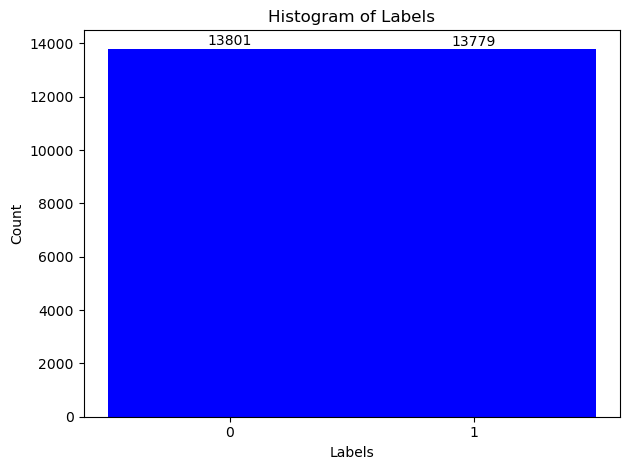

In [27]:
def plot_histogram(y, labels):
    # Count the occurrences of each label in y
    label_counts = [y.count(label) for label in labels]
    
    # Create a bar plot of the label counts
    fig, ax = plt.subplots()
    ax.bar(labels, label_counts, align='center', width=1, color='blue')
    
    # Set the x-axis and y-axis labels and title
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Histogram of Labels')
    
    # Set the x-axis tick marks to the labels
    ax.set_xticks(labels)
    
    # Display the count on top of each bar
    for i, count in enumerate(label_counts):
        ax.text(i, count + 10, str(count), color='black', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

labels = sorted(set(y))
y = [int(label) for label in y]
plot_histogram(y, labels)

For this part i have visualised 2 random images of each class

(2, 2, 32, 32, 3)


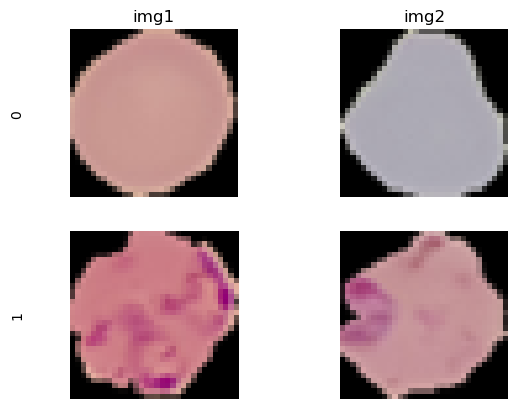

In [28]:
import random

# Function to display the number and %age of missing values in each column
def check_missing_values(data):
    missing_data = data.isnull().sum()
    total_data = len(data)
    missing_data_percentage = (missing_data / total_data) * 100
    print(pd.concat([missing_data, missing_data_percentage], axis=1, keys=['Total Missing', 'Percentage']))

# Function to plot 5 images of each class
def plot_images(X, y):
    fig, axs = plt.subplots(2, 5, figsize=(10, 4))
    for label in np.unique(y):
        idxs = np.where(y == label)[0][:5]
        for i, idx in enumerate(idxs):
            ax = axs[label, i]
            ax.imshow(X[idx].reshape(image_shape))
            ax.axis('off')
            if i == 0:
                ax.set_title(f"Class {label}")
    plt.show()

# Check missing values and plot images
check_missing_values(data)
plot_images(X, y)




# Q3B. #


In [29]:
# Split data into training testing and validation sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
val_X, test_X, val_y, test_y = train_test_split(test_X, test_y, test_size=0.25, stratify=test_y, random_state=42)

# print the sizes of the resulting datasets
print(f"Training set size: {train_X.shape[0]}")
print(f"Validation set size: {val_X.shape[0]}")
print(f"Test set size: {test_X.shape[0]}")

Training set size: 20685
Validation set size: 4137
Test set size: 2758


In [30]:
from sklearn.metrics import log_loss, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

# Create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(512, 64, 16), max_iter=216, activation='relu', solver='adam', random_state=0, batch_size=256, learning_rate='adaptive')
training_losses, val_losses, f1_training, f1_val = [], [], [], []

for i in range(mlp.max_iter):
    # Train model and get training loss
    train_loss = mlp.partial_fit(X_train, train_y, np.unique(train_y)).loss_
    training_losses.append(train_loss)
    
    # Calculate f1 scores for training and validation sets
    y_train_pred = mlp.predict(X_train)
    f1_training.append(f1_score(train_y, y_train_pred, average='weighted'))
    
    y_val_pred = mlp.predict(val_X)
    f1_val.append(f1_score(val_y, y_val_pred, average='weighted'))
    
    # Calculate the validation loss using log loss
    val_loss = log_loss(val_y, y_val_pred)
    val_losses.append(val_loss)
    
    print("Train loss on epoch", i+1, ":", train_loss)
    print("F1 score on training set:", f1_training[-1])
    print("F1 score on validation set:", f1_val[-1])
    print("Validation loss:", val_loss)

# Test model on test set
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)


train loss on epoch  1  :  0.6141192693067294
train loss on epoch  2  :  0.5355041063178839
train loss on epoch  3  :  0.5050339322685741
train loss on epoch  4  :  0.4716930795536599
train loss on epoch  5  :  0.4390426925786105
train loss on epoch  6  :  0.39688123072988996
train loss on epoch  7  :  0.35888679789483446
train loss on epoch  8  :  0.32455925989924406
train loss on epoch  9  :  0.2958535519214364
train loss on epoch  10  :  0.2739689743219246
train loss on epoch  11  :  0.29403065346248713
train loss on epoch  12  :  0.2749204131969044
train loss on epoch  13  :  0.23908678587279505
train loss on epoch  14  :  0.2192570172042952
train loss on epoch  15  :  0.20497201251182032
train loss on epoch  16  :  0.21045886632735214
train loss on epoch  17  :  0.21001212169256886
train loss on epoch  18  :  0.18765126377593627
train loss on epoch  19  :  0.1521919836930372
train loss on epoch  20  :  0.14446035828455858
train loss on epoch  21  :  0.13669238468889225
train loss 

In [31]:
#saving the model using pickle
filename = 'mlp_model.sav'
pickle.dump(mlp, open(filename, 'wb'))

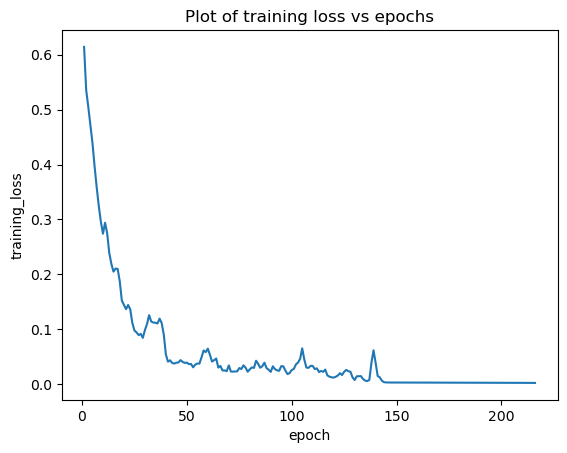

In [32]:
import matplotlib.pyplot as plt

# plot the training losses
plt.plot(range(1, epochs + 1), training_losses)

# set the axis labels
plt.xlabel('epoch')
plt.ylabel('training_loss')

# set the plot title
plt.title('Plot of training loss vs epochs')

# show the plot
plt.show()


The training loss decreases with each epoch, which is a good indicator. As the model is trained on new epochs, the weights and biases change and become more generalised to predict data that has not yet been seen. When the training loss decreases, it indicates that the machine learning model is improving its predictions in relation to the training data. In other words, the model improves its approximation of the function that translates inputs to outputs, which is the end goal of the training process.

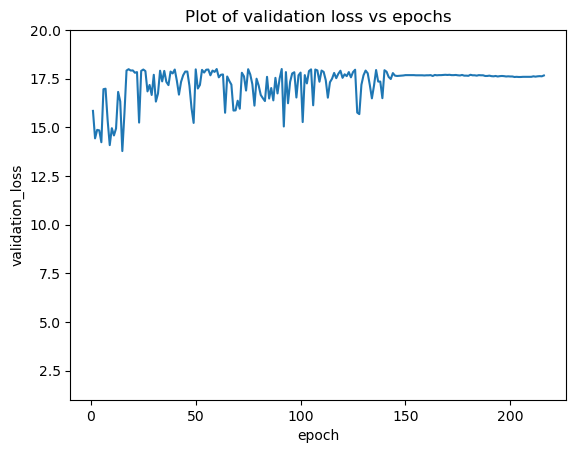

In [33]:
fig, ax = plt.subplots()

# plot the validation losses
ax.plot(range(1, epochs + 1), val_losses)

# set the axis labels
ax.set(xlabel='epoch', ylabel='validation_loss')

# set the plot title
ax.set_title('Plot of validation loss vs epochs')

# set the y-axis limits
ax.set_ylim(1, 20)

# show the plot
plt.show()

The validation loss remains almost constant, indicating that the model performs roughly the same on unseen data as the number of epochs increases. This is not necessarily a bad thing because the fact that the training loss is decreasing while the validation loss remains constant indicates that overfitting is not occurring as the number of epochs increases.

# Q3E. #

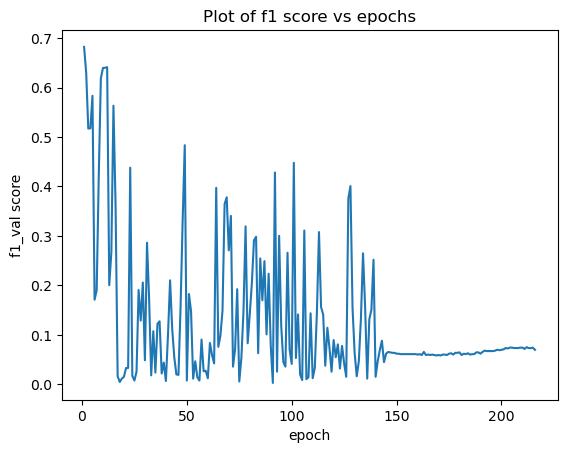

In [34]:
y = f1_val # replace with your own array of 300 values

# create a figure and axis object
fig, ax = plt.subplots()

# plot the f1 scores
ax.plot(range(1, epochs + 1), f1_val)

# set the axis labels
ax.set_xlabel('epoch')
ax.set_ylabel('f1 score')

# set the plot title
ax.set_title('Plot of f1 score vs epochs')

# show the plot
plt.show()

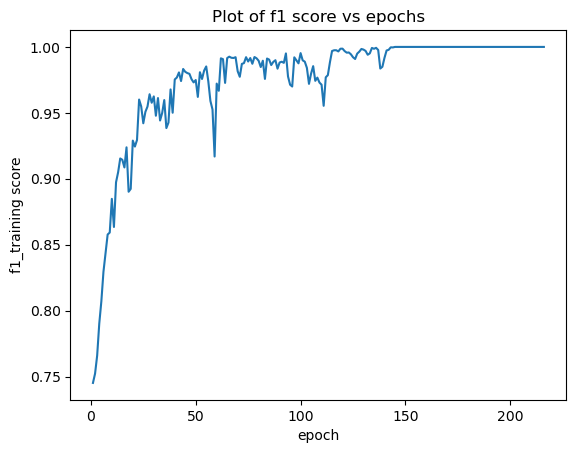

In [35]:
y = f1_training # replace with your own array of 300 values

# create a figure and axis object
fig, ax = plt.subplots()

# plot f1 scores
ax.plot(range(epochs), f1_training, label='Training')
ax.plot(range(epochs), f1_val, label='Validation')

# set the axis labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('F1 Score')
ax.set_title('Plot of F1 score vs epochs')

# add legend
ax.legend()

# show the plot
plt.show()

In [2]:
print("f1 test score: " , f1_score(test_y,y_pred))

f1 test score:  0.8322462490136789


In [37]:
from sklearn.linear_model import LogisticRegression

# create the classifier with specified hyperparameters
clf = LogisticRegression(random_state=2, max_iter=1000)

# train the classifier on the training data
clf.fit(train_X, train_y)

# make predictions on the test data
y_pred = clf.predict(test_X)

In [38]:
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6867295141406816


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, ShuffleSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler


def load_data():
    wine_data = load_wine()
    df = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
    df['target'] = wine_data['target']
    return df


def perform_eda(df):
    print(df.shape)
    print(df['target'].unique())
    print(df.info())
    sns.countplot(x='target', data=df, hue='target')
    df0 = df[df['target'] == 0]
    print(df0.shape)
    df1 = df[df['target'] == 1]
    print(df1.shape)
    df2 = df[df['target'] == 2]
    print(df2.shape)


def perform_classification(X, y, cv_technique):
    sc_X = StandardScaler()
    X = sc_X.fit_transform(X)
    if cv_technique == "holdout":
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)
        model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation="relu", random_state=0).fit(X_train, y_train)
        print(f"test_accuracy={model.score(X_test, y_test)}")
    elif cv_technique == "kfold":
        k = 4
        kfold_validation = KFold(k)
        model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation="relu", random_state=0)
        results = cross_val_score(model, X, y, cv=kfold_validation)
        print(np.mean(results))
    elif cv_technique == "stratified_kfold":
        k = 3
        skfold = StratifiedKFold(n_splits=k)
        model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation="relu", random_state=0)
        scores = cross_val_score(model, X, y, cv=skfold)
        print(np.mean(scores))
    elif cv_technique == "montecarlo":
        montecarlo = ShuffleSplit(test_size=.25, random_state=0)
        model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation="relu", random_state=0)
        scores = cross_val_score(model, X, y, cv=montecarlo)
        print(np.mean(scores))
    elif cv_technique == "leave_p_out":
        p = 10
        lpo = LeavePOut(p)
        model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation="relu", random_state=0)
        scores = cross_val_score(model, X, y, cv=lpo)
        print(np.mean(scores))


if __name__ == '__main__':
    df = load_data()
    perform_eda(df)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    perform_classification(X, y, "holdout")
    perform_classification(X, y, "kfold")